# Section 6: "Vectorized" Operations: Optimized Computations on NumPy Arrays
In this section, we will:
- Define the term vectorization, as it is used in the context of Python/NumPy.
- Prescribe the use of NumPy's vectorized functions for performing optimized numerical computations on arrays.
- Compare the performance of a simple non-vectorized computation to a vectorized one.
- Describe how unary, binary, and sequential functions are defined on NumPy arrays.
- Provide a brief overview of linear algebra functions.

NumPy's ND-arrays are *homogenous* - an array can only contain data of a single type. For instance, an array can contain 8-bit integers or 32-bit floating point numbers, but not a mix of the two. This is in stark contrast to Python's lists (and its other containers), which are entirely unrestricted in the variety of contents they can possess; a given list could simultaneously contain strings, integers, floats, and other objects. This restriction on an array's contents comes at a great benefit - in "knowing" that an array's contents are homogenous in data type, NumPy is able to delegate the task of performing mathematical operations on the array's contents to optimized, compiled C-code. This is a process that is referred to as **vectorization**. The outcome of this can be a *tremendous* speedup relative to the analgous computation performed in Python, which must painstakingly check the data type of *every* one of the items as it iterates over the arrays, since Python typically works with lists with unrestricted contents.    

<div class="alert alert-block alert-info"> 
**Definition**: In the context of high-level languages like Python, Matlab, and R, the term **vectorization** describes the use of optimized, pre-compiled code written in a low-level language (e.g. C) to perform mathematical operations over a sequence of data. This is done in place of an explicit iteration written in the native language code (e.g. a "for-loop" written in Python). 
</div>

Consider, for instance, the task of summing the integers 0-9,999 stored in an array. Calling NumPy's `sum` function cues optimized C code to iterate over the integers in the array and tally the sum the result is then returned by the function (`np.sum` is therefore a "vectorized" function). Let's time how long it takes to compute this sum: 


<div class="alert alert-block alert-warning"> 
**FYI**: `%%timeit` is a utility built into Jupyter notebooks and the IPython console that allows one to time how long it takes to execute the contents of a cell. It is **not** part of the Python language. This sort of command is referred to as a **cell magic** command, and is indicated by the leading `%%` symbols.</div>

In [1]:
import numpy as np

In [2]:
%%timeit 
# sum an array, using NumPy's vectorized 'sum' function
np.sum(np.arange(10000))

10.9 µs ± 50.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now let's compare this to the time required to *explicitly* loop over the array in Python and tally up the sum. Python is unable to take advantage of the fact that the array's contents are all of a single data type - it has to check, for every iteration, if it is dealing with an integer, a string, a floating point number, etc, just as it does when iterating over a list. This will slow down the computation massively.

In [3]:
%%timeit
# sum an array by explicitly looping over the array in Python
total = 0
for i in np.arange(10000):
    total = i + total

822 µs ± 4.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Timed on my computer, the sum is **over 50 times faster when performed in NumPy**! This should make it clear that, whenever computational efficiency is important, one should avoid performing explicit for-loops over long sequences of data in Python, be them lists or NumPy arrays. NumPy provides a whole suite of vectorized functions. In fact, the name of the game when it comes to leveraging NumPy to do computations over arrays of numbers is to exclusively leverage its vectorized functions. The following computations all invoke vectorized functions: 

```python
# multiply 2 with each number in the array
>>> 2 * np.array([2, 3, 4]) 
array([4, 6, 8])

# subtract the corresponding entries of the two arrays
>>> np.array([10.2, 3.5, -0.9]) - np.array([8.2, 3.5, 6.5])
array([ 2. ,  0. , -7.4])

# Take the "dot product" of the two arrays 
# "dot product" means: multiply their corresponding entries and sum the result
>>> np.dot(np.array([1, -3, 4]), np.array([2, 0, 1]))
6
```

<div class="alert alert-block alert-success"> 
**Takeaway**: NumPy provides a highly-optimized functions for performing mathematical operations on arrays of numbers. Performing extensive iterations (e.g. via 'for-loops') in Python to perform repeated mathematical computations should nearly always be replaced by the use of vectorized functions on arrays. This informs the entire design paradigm of NumPy.  
</div>

## NumPy's Mathematical Functions
We will now take some time to survey the various types of **vectorized mathematical functions** that NumPy supplies, and how these mathematical operations, which traditionally are defined on individual numbers, are applied to arrays of numbers. We will look at unary functions ($f(x)$), binary functions ($f(x,y)$), and functions that operate on sequences of numbers ($f(\{x_i\}_{i=0}^{n-1})$). These represent the essential mathematical tools of the NumPy library. 

### Unary Functions
A unary function is a mathematical function that only accepts one operand (i.e. argument): $f(x)$. NumPy supplies many familiar unary functions:

| Unary Function: $f(x)$    | NumPy Function |
| ------------- |:-------------:|
| $|x|$ | `np.absolute` |   
| $\sqrt{x}$ | `np.sqrt` | 
| **Trigonometric Functions** | <br> | 
| $\sin{x}$ | `np.sin` |   
| $\cos{x}$ | `np.cos` | 
| $\tan{x}$ | `np.tan` | 
| **Logarithmic Functions** | <br> | 
| $\ln{x}$ | `np.log` |   
| $\log_{10}{x}$ | `np.log10` | 
| $\log_{2}{x}$ | `np.log2` | 
| **Exponential Functions** | <br> | 
| $e^{x}$ | `np.exp` |   

This is by no means an exhaustive list of the available unary functions, for example the hyperbolic and inverse trigonometric functions are available too. That can be found [HERE](). These familiar functions are defined to work on individual numbers (i.e. "scalars"), not sequences of numbers. How, then, does NumPy implement these functions so that they behave in a coherent way when operating on arrays? The answer is that is **maps** the function over the array - applying $f(x)$ to each element within the array, and producing a new array as a result (i.e. the input array is not overwritten).

```python
import numpy as np
>>> x = np.array([0., 1., 2.])

# produces array([exp(0), exp(1), exp(2)])
>>> np.exp(x)  # x is not overwritten by this
array([ 1. ,  2.71828183,  7.3890561 ])
```

To be explicit, if we have a 2D-array, $X$, of shape ($m$,$n$):
\begin{equation}
X = 
\begin{bmatrix}
    x_{0,0} &  \cdot & \cdot & \cdot & x_{0,n-1} \\
    \cdot & \cdot & &    & \cdot \\
    \cdot & & \cdot & & \cdot \\
    \cdot & & & \cdot & \cdot \\
    x_{m-1,0} & \cdot & \cdot & \cdot & x_{m-1,n-1} 
\end{bmatrix}
\end{equation}

Then applying the unary function, $f(x)$, to the array $X$, will form a new array by applying $f(x)$ to *each* of $X$'s entries:
\begin{equation}
f(X) = 
\begin{bmatrix}
    f(x_{0,0}) &  \cdot & \cdot & \cdot & f(x_{0,n-1}) \\
    \cdot & \cdot & &    & \cdot \\
    \cdot & & \cdot & & \cdot \\
    \cdot & & & \cdot & \cdot \\
    f(x_{m-1,0}) & \cdot & \cdot & \cdot & f(x_{m-1,n-1}) 
\end{bmatrix}
\end{equation}

This process is generalizes to arrays of any dimensionality and shape.

<div class="alert alert-block alert-success"> 
**Takeaway**: Applying a unary NumPy-function, $f(x)$, to an array will apply $f(x)$ elementwise on the array. 
</div>

In case it isn't clear why it would be useful to make use of unary functions in this way, suppose that you want to plot the sine function. A trivial way to do this is to generate a finely-spaced sequence of points in an array, to cover the domain you want to plot sine on, and then simply feed this array to the `np.sin` function. A "run-able" cell of such code is provided below.

<IPython.core.display.Javascript object>


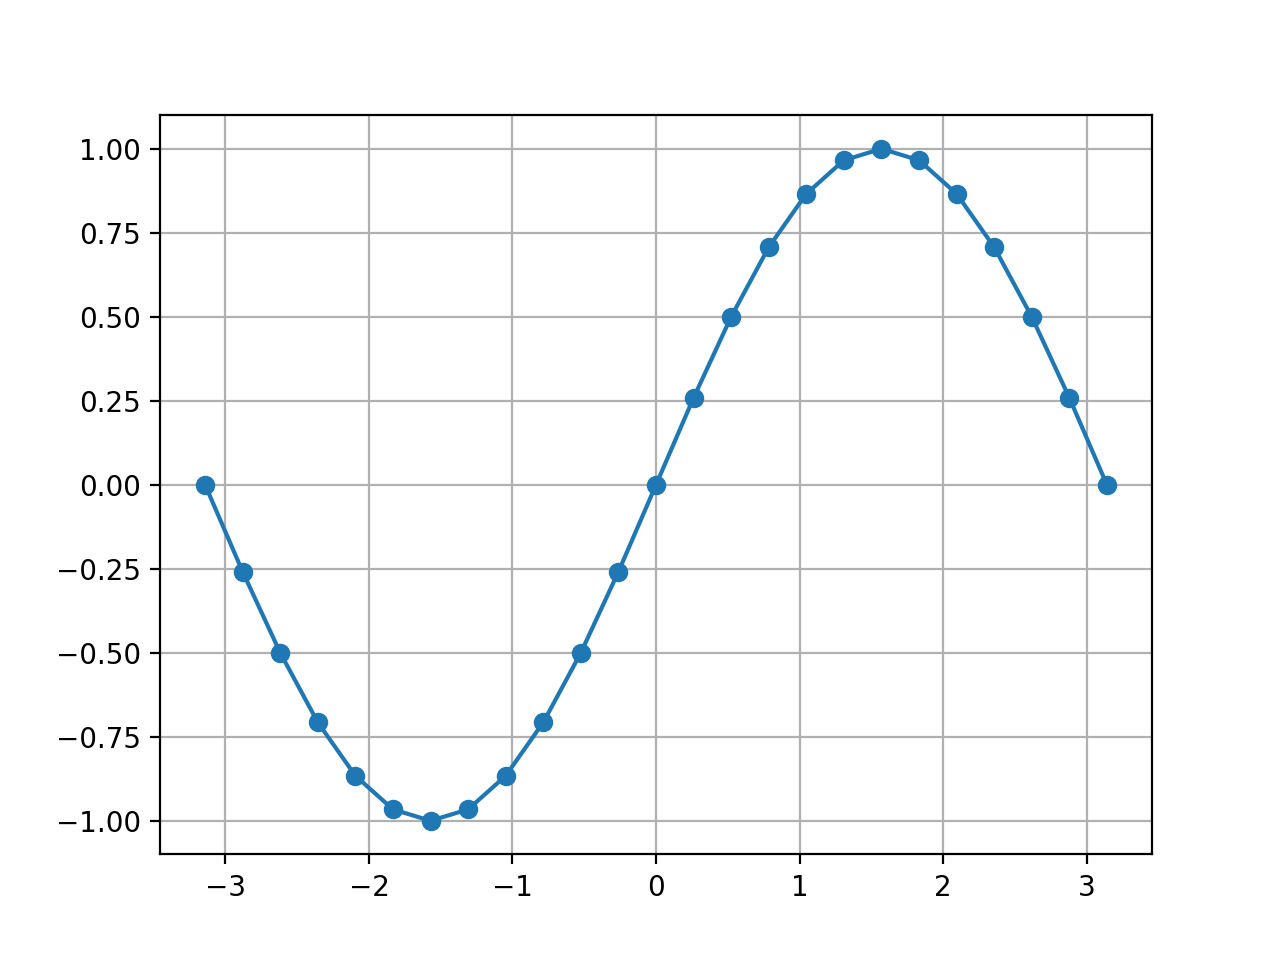

In [19]:
# To run this code: select this cell, and then press <CTRL>+<RETURN> 
import numpy as np

# we've not introduced matplotlib yet - it is a Python library
# for plotting numerical data
%matplotlib notebook
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 25)  # create 25 points spaced evenly between -pi and pi
y = np.sin(x)

fig, ax = plt.subplots()
ax.grid(True)
ax.plot(x, y, marker="o");

## Binary Functions
A binary function has the form $f(x,y)$. The arithmetic operations are all binary functions:

| Binary Function: $f(x, y)$    | NumPy Function | Python operator |
| ------------- |:-------------:|:-------------:|
| $x\cdot y$ | `np.multiply` | `*`|   
| $x\div y$ | `np.divide` | `/`|   
| $x+y$ | `np.add` | `+`|
| $x-y$ | `np.subtract` | `-`|
| $x^{y}$ | `np.power` | `**`|
| $x \% y$ | `np.mod` | `%`|

<div class="alert alert-block alert-warning"> 
**FYI**: The "modulo" function, denoted by $\%$, is defined to return the **remainder** of division: $5 \% 3 = 2$
</div>

As indicated in this table, these NumPy functions can be called by invoking the familiar Python math-operators, when used in the context of NumPy arrays.

Here are some other common binary functions:

| Binary Function: $f(x, y)$    | NumPy Function | 
| ------------- |:-------------:|
| $\max(x, y)$ | `np.maximum` |
| $\min(x, y)$ | `np.minimum` |   

There are two cases that we must consider when working with binary functions, in the context of NumPy arrays:
  1. When both operands of the function are arrays (of the same shape).
  2. When one operand of the function is a scalar (i.e. a single number) and the other is an array.

### Binary functions applied on two same-shape arrays
Similar to the behavior of unary functions applied to an array, a binary function will operate on two same-shape arrays by applying the function to their pairwise elements.

```python
>>> x = np.array([0., 1., 2.])
>>> y = np.array([-1., 1., -2.])

# pair-wise addition of elements in `x` and `y`
>>> x + y  # convenient notation for calling `np.add(x, y)`
array([-1.,  2.,  0.])
```

To be concrete, suppose we have a 2D-array, $X$, of shape ($m$,$n$):
\begin{equation}
X = 
\begin{bmatrix}
    x_{0,0} &  \cdot & \cdot & \cdot & x_{0,n-1} \\
    \cdot & \cdot & &    & \cdot \\
    \cdot & & \cdot & & \cdot \\
    \cdot & & & \cdot & \cdot \\
    x_{m-1,0} & \cdot & \cdot & \cdot & x_{m-1,n-1} 
\end{bmatrix}
\end{equation}

and and array, $Y$, of the same shape
\begin{equation}
Y = 
\begin{bmatrix}
    y_{0,0} &  \cdot & \cdot & \cdot & y_{0,n-1} \\
    \cdot & \cdot & &    & \cdot \\
    \cdot & & \cdot & & \cdot \\
    \cdot & & & \cdot & \cdot \\
    y_{m-1,0} & \cdot & \cdot & \cdot & y_{m-1,n-1} 
\end{bmatrix}
\end{equation}

then, according to the above prescription, applying a binary NumPy-function, $f(x,y)$ on these two arrays produces:

\begin{equation}
f(X, Y) = 
\begin{bmatrix}
    f(x_{0,0}, y_{0,0}) &  \cdot & \cdot & \cdot & f(x_{0,n-1}, y_{0,n-1}) \\
    \cdot & \cdot & &    & \cdot \\
    \cdot & & \cdot & & \cdot \\
    \cdot & & & \cdot & \cdot \\
    f(x_{m-1,0}, y_{m-1,0}) & \cdot & \cdot & \cdot & f(x_{m-1,n-1}, y_{m-1,n-1}) 
\end{bmatrix}
\end{equation}

This process is generalizes to arrays of any dimensionality and shape, as long as the two operands have the same shape.

<div class="alert alert-block alert-danger"> 
**Important Note**: You **can** apply binary NumPy functions to arrays of unlike shapes. For instance, you may want to add a single shape-(2,) array with ten of such arrays, which are stored as a single shape-(10,2) array. This process is known as **broadcasting**, and will be covered in detail in the Advanced NumPy module.  
</div>

<div class="alert alert-block alert-success"> 
**Takeaway**: Applying a binary NumPy-function, $f(x,y)$, to two same-shape arrays will apply $f(x,y)$ to each of their pairwise elements, producing an array of the same shape as either of the operands.  
</div>

### Binary functions applied on a scalar and an array
By now, you may be able to guess NumPy's behavior when you perform feed a binary function a scalar (i.e. a single number) and an array: the function is applied elementwise on the array, with each application filling one of the function's arguments, and the single scalar provided everywhere as the other operand. This matches exactly the behavior seen in traditional linear algebra.

```python
>>> 3 * np.array([0., 1., 2.])  # convenient notation for calling `np.multiply(2, x)`
array([ 0.,  3.,  6.])

>>> np.array([1., 2., 3.]) ** 2  # convenient notation for calling `np.power(x, 2)`
array([ 1.,  4.,  9.])
```

For the sake of being thorough: suppose we have a scalar, $\lambda$, and a 2D-array, $X$, of shape ($m$,$n$):
\begin{equation}
X = 
\begin{bmatrix}
    x_{0,0} &  \cdot & \cdot & \cdot & x_{0,n-1} \\
    \cdot & \cdot & &    & \cdot \\
    \cdot & & \cdot & & \cdot \\
    \cdot & & & \cdot & \cdot \\
    x_{m-1,0} & \cdot & \cdot & \cdot & x_{m-1,n-1} 
\end{bmatrix}
\end{equation}

then, according to the above prescription, applying a binary NumPy-function, $f(x,y)$ on this scalar/array pair produces:

\begin{equation}
f(X, \lambda) = 
\begin{bmatrix}
    f(x_{0,0}, \lambda) &  \cdot & \cdot & \cdot & f(x_{0,n-1}, \lambda) \\
    \cdot & \cdot & &    & \cdot \\
    \cdot & & \cdot & & \cdot \\
    \cdot & & & \cdot & \cdot \\
    f(x_{m-1,0}, \lambda) & \cdot & \cdot & \cdot & f(x_{m-1,n-1}, \lambda) 
\end{bmatrix}
\end{equation}

Also, if $f(x,y)$ is commutative, i.e. $f(x,y) = f(y,x)$, then $f(\lambda, X) = f(X, \lambda)$.

This process is generalizes to an array of any dimensionality and shape. 

<div class="alert alert-block alert-success"> 
**Takeaway**: Applying a binary NumPy-function, $f(x,y)$, to an array and a scalar amounts to "distributing" the function elementwise over the array, everywhere utilizing the scalar as the other operand for the binary function.
</div>

## Sequential Functions
A sequential function expects a variable-length sequence of numbers as an input, and produces a single number as an output: $f(\{x_i\}_{i=0}^{n-1})$. The following are some sequential NumPy functions:

| Sequential Function: $f(\{x_i\}_{i=0}^{n-1})$    | NumPy Function |
| ------------- |:-------------:|
| Mean of $\{x_i\}_{i=0}^{n-1}$ | `np.mean` |
| Median of $\{x_i\}_{i=0}^{n-1}$ | `np.median` | 
| Variance of $\{x_i\}_{i=0}^{n-1}$ | `np.var` | 
| Standard Deviation of $\{x_i\}_{i=0}^{n-1}$ | `np.std` | 
| Maximum Value of $\{x_i\}_{i=0}^{n-1}$ | `np.max` |
| Minimum Value of $\{x_i\}_{i=0}^{n-1}$ | `np.min` |
| Sum of $\{x_i\}_{i=0}^{n-1}$ | `np.sum` | 

The implementation of sequential NumPy-functions is straightforward when working with 1-dimensional arrays:
```python
>>> x = np.array([0., 2., 4.])
>>> np.sum(x)  # can also be invoked as `x.sum()`
6.
>>> np.mean(x)  # can also be invoked as `x.mean()`
3.
```
How do these functions behave when they are fed multi-dimensional arrays? **By default, NumPy's sequential functions treat any multidimensional array as if it had been reshaped to a 1-dimensional array**. For example:

```python
>>> x = np.array([[0, 1],
                  [2, 3],
                  [4, 5]])

>>> np.sum(x)
15

>>> np.sum(x.reshape(6))
15
```

This default behavior of sequential NumPy-functions can be overwritten by specifying the keyword argument `axis`, within the sequential function. This is a very useful and common thing to do.




### Specifying the `axis` Keyword Argument in Sequential NumPy-Functions
Let's delve into the meaning of the `axis` argument by first seeing it in action:

```python
# shape-(3,2)
>>> x = np.array([[0, 1],
                  [2, 3],
                  [4, 5]])

# sum over axis-0, within axis-1
# i.e. sum over the rows, within each column
>>> np.sum(x, axis=0)  # equivalent: x.sum(axis=0)
array([6, 9])

# sum over axis-1, within axis-0
# i.e. sum over the columns, within each row
>>> np.sum(x, axis=1)  # equivalent: x.sum(axis=1)
array([1, 5, 9])

# negative axis-indices can be used too
>>> np.sum(x, axis=-1)  # equivalent: np.sum(x, axis=1)
array([1, 5, 9])

# sum over axis-0 and axis-1
# i.e. sum the array as if it were a 1D sequence (default behavior)
>>> np.sum(x, axis=(0, 1))  # equivalent: x.sum(axis=(0, 1))
15

```

The `axis` argument thus specifies **which axis or axes are traversed to produce the input sequences for the sequential function to act on**. One sequence is designated for each valid combination of indices of the non-traversed axes. For example, `np.sum(x, axis=0)` designates the sequences:

```
x[:, 0] -> array([0, 2, 4])  # traverse all rows within column-0
x[:, 1] -> array([1, 3, 5])  # traverse all rows within column-1
```
to be summed over. Axis-1 is the only "non-traversed" axis, and because axis-1 of `x` has a shape 2 (`x` has two columns)  the "valid-combinations of indices for the non-traversed axes" is simply index-0 (i.e. column-0) and index-1 (i.e. column-1) on axis-1. Thus each column of `x` is summed over, producing a shape-(2,) array containing the result of the two sums. Similarly, summing over axis-1 (over the columns of the data) produces a shape-(3,) array as a result. 

You can also supply *multiple* axes to the keyword argument by specifying them in as "tuple" of integers (a Python list will **not** work). `np.sum(x, axis=(0,1))` cues NumPy to traverse *both* of `x`'s axes, designating the entirety of `x`'s contents as the sequence, and summing to a single number. Recall that this matches the default behavior when no `axis` keyword argument is specified.

<div class="alert alert-block alert-success"> 
**Takeaway**: All sequential NumPy-functions have an `axis` keyword argument that can be specified. `axis` is to be fed a single integer or a tuple of integers, which indicate which array axes are to be traversed to designate the sequences of array data to be operated on. A sequence is generated for each valid combination of indices for the non-traversed axes. By default, **all** of the input-array's axes are included, thus the entire content of the array is treated as a single sequence.
</div>

#### Understanding the `axis` argument with Multi-Dimensional Array
The key to understanding the `axis` keyword argument, when working with multi-dimensional arrays, is to be comfortable with how array traversal works in NumPy. Refer to Section 5 of this module for a refresher on this topic. Consider the following shape-(4,2,3) array:

```python
>>> x = np.arange(24).reshape(4,2,3)
>>> x
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])
```

We can think of this array as possessing four, two-by-three "sheets" of numbers. Traversing along axis-0 of `x` amounts to stepping from sheet to sheet, given each valid combination of axis-1 and axis-2 indices. Thus specifying `axis=0` in a sequential NumPy-function (e.g. `np.sum`) designates six distinct sequences within `x`:
```
x[:, 0, 0] -> array([ 0,  6, 12, 18])  {mean =  9}
x[:, 0, 1] -> array([ 1,  7, 13, 19])  {mean = 10}
x[:, 0, 2] -> array([ 2,  8, 14, 20])  {mean = 11}
x[:, 1, 0] -> array([ 3,  9, 15, 21])  {mean = 12}
x[:, 1, 1] -> array([ 4, 10, 16, 22])  {mean = 13}
x[:, 1, 2] -> array([ 5, 11, 17, 23])  {mean = 14}
```

and `np.mean(x, axis=0)` will compute the mean of these six respective sequences. Also, notice that the set of valid combinations of axis-1 and axis-2 indices corresponds to the two-by-three grid associated with one of the sheets. NumPy will return the six mean values in a shape-(2,3) array, so that the correspondence between each sequence and its mean-value is unambiguous:

```python
>>> np.mean(x, axis=0)
array([[  9.,  10.,  11.],
       [ 12.,  13.,  14.]])
```

<div class="alert alert-block alert-warning"> 
**Note**: Recall from Section 5 that NumPy uses row-major ordering (a.k.a C-ordering) when traversing arrays.
</div>

Suppose we specify two axes, say axis-0 and axis-2; traversing these two axes amounts to stepping along the sheets and columns of `x`, for each axis-1 index. Thus two sequences are produced:

```
x[:, 0, :] -> array([ 0,  1,  2,  6,  7,  8, 12, 13, 14, 18, 19, 20])  {mean = 10}
x[:, 1, :] -> array([ 3,  4,  5,  9, 10, 11, 15, 16, 17, 21, 22, 23])  {mean = 13}
```

```python
>>> np.mean(x, axis=(0, 2)
array([ 10.,  13.])
```
These observations lead us to the following general result:
<div class="alert alert-block alert-info"> 
**Result**: If $X$ is an $N$-dimensional array, and $j$ (with $j \leq N$) axes are specified in the `axis` keyword argument for a sequential NumPy-function, then a $N-j$-dimensional array will be produced by this function. The shape of the result will be that of $X$, but with the shapes associated with the specified axes removed.
</div>


## Conclusion
NumPy provides users with a wide variety of functions capable of performing operations on arrays of data. It's use of **vectorization** makes these functions incredibly fast, when compared to the analagous computations performed in pure Python. Although the preceding discussion laid out a substantial number of rules for how these functions work, one should not worry about memorizing them. Rather, it is best to apply these functions to arrays of various dimensionality, and build any intuition for them. You may be pleasantly surprised by how easy it is to get a hang of this material by simply putting it to practice. 